# ДЗ

1. В исходных данных стандартизируйте исходный признак price_doc

2. В исходных данных найдите потенциальные выбросы по признаку price_doc с помощью метода ч-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

3. Добавьте фишку с логарифмированием в свою функцию outliers_iqr(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3.

**ссылка на колаб + файл

loading libraries and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# data = pd.read_csv('sber_data.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sber_data.csv')
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


normalize the data in price_doc, but first let's figure out how much data is missing

In [ ]:
missing_values = data['price_doc'].isnull().sum()
print(f'Количество пропущенных значений в price_doc: {missing_values}')

Количество пропущенных значений в price_doc: 0


No values ​​are missing, let's normalize:

In [ ]:
scaler = StandardScaler()
data['price_doc_scaled'] = scaler.fit_transform(data[['price_doc']])
print(data[['price_doc', 'price_doc_scaled']].head())

   price_doc  price_doc_scaled
0    5850000         -0.266324
1    6000000         -0.234943
2    5700000         -0.297704
3   13100000          1.250402
4   16331452          1.926434


let's see what we got.

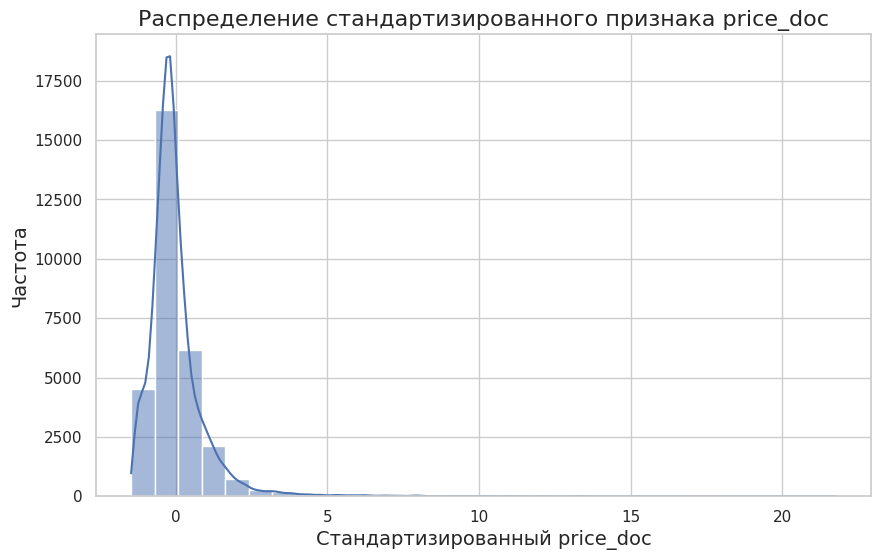

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['price_doc_scaled'], bins=30, kde=True)
plt.title('Распределение стандартизированного признака price_doc', fontsize=16)
plt.xlabel('Стандартизированный price_doc', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

overall, the distribution appears normal.

finding outliers by z-deviation (we will apply logarithmic transformation, calculate z-scores for logarithmized data, count the number of outliers, these are those scores that have a z-score greater than 3.7)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['price_doc_scaled'], bins=30, kde=True)
plt.title('Распределение стандартизированного признака price_doc', fontsize=16)
plt.xlabel('Стандартизированный price_doc', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Количество выбросов: 52


creating the outliers_iqr function

In [ ]:
def outliers_iqr(data, feature, log_scale=False):
    feature_data = data[feature]
    if log_scale:
        feature_data = np.log1p(feature_data)
    Q1 = np.percentile(feature_data, 25)
    Q3 = np.percentile(feature_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((feature_data < lower_bound) | (feature_data > upper_bound)).sum()
    return outliers

and finally let's apply the function

In [ ]:
# data = pd.read_csv('sber_data.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sber_data.csv')
outliers = outliers_iqr(data, 'price_doc', log_scale=True)
print(f'Количество выбросов: {outliers}')

Количество выбросов: 92
